## Regresion lineal

- **Tasa de natalidad (promedio) adolecente versus pobreza**

A continuación se presenta un modelo de regresion lineal con la finalidad de demostrar la utilización de los distinas particiones que se realizan a la data. Además se utilizan métricas de calidad para la evaluación del modelo.

**Indice**

- Modelo con particion de la data (train y test)
- Modelo sin particion y utilizando la forma de R


**Info data**

Conjunto de datos de tamaño n = 51; para los 50 estados y el distrito de Columbia de USA. 

Variables:

- **y** : tasa de natalidad del año 2002 por cada 1000 mujeres de 15 a 17 años (**Brth15to17**) 
- **x** : tasa de pobreza (**PovPct**) (porcentaje de la población del estado que vive en hogares con ingresos por debajo del nivel de pobreza definido por el gobierno federal).

Fuente: Mind On Statistics, 3.ª edición, Utts and Heckard

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#
import warnings
warnings.filterwarnings("ignore")

from pathlib import Path
import os
Path.cwd()


WindowsPath('c:/Users/rodrigo/Documents/GitHub/Reg_Lineal_particiones')

In [9]:
df = pd.read_csv("df_linear.csv",sep=";")
print(df.shape)
print(df.info())
(df.head())

(51, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    51 non-null     object 
 1   PovPct      51 non-null     float64
 2   Brth15to17  51 non-null     float64
 3   Brth18to19  51 non-null     float64
 4   ViolCrime   51 non-null     float64
 5   TeenBrth    51 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB
None


,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1


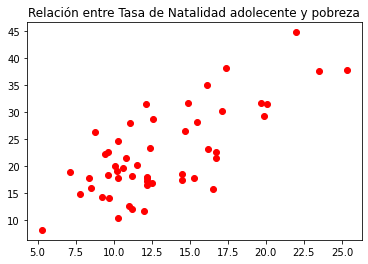

In [10]:
plt.scatter(df.PovPct, df.Brth15to17, c ="r")
plt.title('Relación entre Tasa de Natalidad adolecente y pobreza');

Existe una relacion lineal entre ambas variables.

**1.- Preparación del Modelo con particion de la data**

In [11]:
# Preparacion para modelo

X = df[['PovPct']]
y = df['Brth15to17']

# Separamos el 20% para el test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=False)

# Obtencion de las intancias de Regresion
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_train, y_train)

LinearRegression()

**Parametros del modelo**

In [12]:
print('Intercepto:' ,regresion_lineal.intercept_)   
print('Coeficiente:',regresion_lineal.coef_)

Intercepto: 4.989041843074087
Coeficiente: [1.34794096]


**Modelo**

$$ Tasa Natalidad Adolecente = 4.98 + 1.34 (pobreza)$$





**Predicciones**

In [13]:
# en data train
y_train_predic = regresion_lineal.predict(X_train)

# en data test
y_test_predic = regresion_lineal.predict(X_test)

**Prediccion en Train data**

In [14]:
actual_predicted_traindata=pd.DataFrame({'Actual':y_train,'Predicted':y_train_predic}).set_index('Actual')
actual_predicted_traindata.head()

,Predicted
Actual,
31.5,32.082655
18.9,14.559423
35.0,26.690891
31.6,25.073362
22.6,27.499656


**Prediccion en Test data**

In [15]:
actual_predicted_testdata=pd.DataFrame({'Actual':y_test,'Predicted':y_test_predic}).set_index('Actual')
actual_predicted_testdata.head()

,Predicted
Actual,
29.2,31.813067
17.3,24.534186
28.2,25.882127
38.2,28.443214
17.8,16.311746


**Grafico de Modelo**

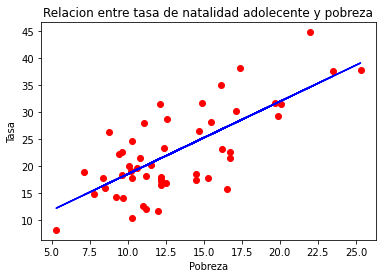

In [16]:
plt.scatter(X,y,color='r') 
reg_line = regresion_lineal.coef_*X + regresion_lineal.intercept_ 
plt.plot(X,reg_line,'b')   # mejor curva
plt.title('Relacion entre tasa de natalidad adolecente y pobreza')
plt.xlabel('Pobreza')
plt.ylabel('Tasa')
plt.show()




**Métricas**

- **MSE**: básicamente mide el error cuadrado promedio de nuestras predicciones. Calcula la diferencia cuadrada entre las predicciones y el objetivo y luego promedia esos valores. Cuanto mayor sea el valor, peor será el modelo.

$MSE = \frac{1}{N} \sum_{i=1}^{N}(y_{i} - \hat y_{i})^2$

- **RMSE**: es solo la raíz cuadrada de MSE. La raíz cuadrada se introduce para hacer que la escala de los errores sea igual a la escala de los objetivos.

$RMSE =  \sqrt{MSE} $

In [17]:
# Diferencia cuadratica media en data train
train_MSD = mean_squared_error(y_train, y_train_predic)

RMSD_train = ('RMSD train data:',np.sqrt(mean_squared_error(y_train,y_train_predic)))

# Diferencia cuadratica media en data test
test_MSD = mean_squared_error(y_test, y_test_predic)
RMSD_test = ('RMSD test data:',np.sqrt(mean_squared_error(y_test,y_test_predic)))


**Graficos para los distintos conjunto de datos**

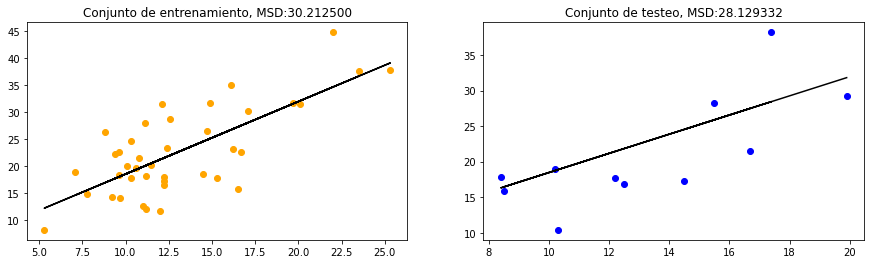

In [18]:
fig, axs = plt.subplots(1,2,figsize=(15,4))

# Primer grafico de entrenamiento
axs[0].scatter(X_train,y_train, color='orange')
axs[0].plot(X_train,y_train_predic, color='black')
axs[0].set_title('Conjunto de entrenamiento, MSD:{:0f}'.format(train_MSD))

# Segundo grafico de testeo
axs[1].scatter(X_test,y_test, color='blue')
axs[1].plot(X_test,y_test_predic, color='black')
axs[1].set_title('Conjunto de testeo, MSD:{:0f}'.format(test_MSD));


**MSE y RMSE para train data**

In [19]:
print('MSE:',mean_squared_error(y_train,y_train_predic))
print('RMSE:',np.sqrt(mean_squared_error(y_train,y_train_predic)))

MSE: 30.212499640110984
RMSE: 5.496589819161603


**MSE y RMSE para test data**

In [20]:
print('MSE:',mean_squared_error(y_test,y_test_predic))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_test_predic)))

MSE: 28.129331562079372
RMSE: 5.303709226765677


**R2-Score del modelo**

In [21]:
print('r2_score para train data:',r2_score(y_train,y_train_predic))
print('r2_score para test data:',r2_score(y_test,y_test_predic))

r2_score para train data: 0.5360979926864171
r2_score para test data: 0.4926741512875834


In [22]:
# df
s1 = pd.DataFrame(['Train data','Test data']) 
s1.rename(columns={0:'Data'},inplace=True)
s2 = pd.DataFrame({'MSE':(mean_squared_error(y_train,y_train_predic),mean_squared_error(y_test,y_test_predic))})  
s3 = pd.DataFrame({'RMSE':(np.sqrt(mean_squared_error(y_train,y_train_predic)),np.sqrt(mean_squared_error(y_test,y_test_predic)))})
s4 = pd.DataFrame({'r2-score':(r2_score(y_train,y_train_predic),r2_score(y_test,y_test_predic))})

In [23]:
pd.concat([s1,s2,s3,s4],axis=1).set_index('Data')

,MSE,RMSE,r2-score
Data,,,
Train data,30.212500,5.496590,0.536098
Test data,28.129332,5.303709,0.492674


## Conclusiones Parte 1

**Modelo**

- La tasa de natalidad de 15 a 17 años aumenta 1.34 unidades, en promedio, por cada unidad (uno por ciento) de aumento en la tasa de pobreza.
- La interpretación del intercepto (valor=4.267) es que si hubiera estados con índice de pobreza = 0, el promedio previsto para la tasa de natalidad de 15 a 17 años sería 4.98 para esos estados. Dado que no hay estados con índice de pobreza = 0, esta interpretación del intercepto no es significativa en la práctica para este ejemplo.



**Metricas**

- El **MSE** y **RMSE** para el modelo son bastante similares, lo que muestra un "buen rendimiento" y estabilidad.
- El **R2 score** (train data) tiene mediocres resultados, ya que solo puede explicar el 53.60% de la variación. En el caso **R2 score** (test data), es aun peor.

**2.- Preparación del Modelo sin particion de la data**

In [24]:
# Modelo
modelo = smf.ols(formula = 'Brth15to17 ~ PovPct', data=df).fit()

**Parametros del modelo**

In [25]:
modelo.params

Intercept    4.267293
PovPct       1.373345
dtype: float64

**Modelo**

$$ Tasa Natalidad Adolecente = 4.26 + 1.37 (pobreza)$$

El Modelo obtenido no es muy diferente al anterior.


**Intervalo de confianza para los coeficientes**

In [26]:
modelo.conf_int(alpha=0.05)

,0,1
Intercept,-0.816424,9.351010
PovPct,1.004542,1.742149


**Predicciones con intervalo de confianza del 95%**

In [27]:
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,31.871535,1.498712,28.859760,34.883310,20.317787,43.425284
1,14.018045,1.350460,11.304194,16.731897,2.538354,25.497736
2,26.378154,0.950613,24.467824,28.288483,15.061455,37.694852
3,24.730139,0.843263,23.035540,26.424739,13.447853,36.012425


**Grafico del Modelo**

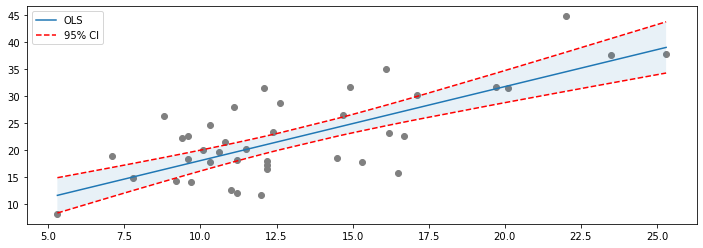

In [28]:
# Predicciones con intervalo de confianza al 95%
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Grfico del modelo
fig, ax = plt.subplots(figsize=(12, 4))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();


**Supuestos del Modelo Lineal**

- **Diagnóstico de los Residuales**

Esperamos observar una nube de puntos que no evidencian relación.

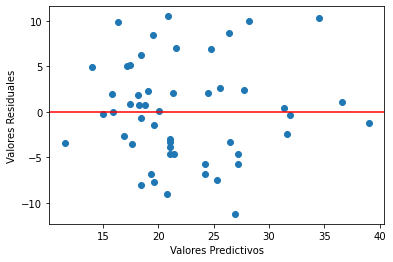

In [29]:
plt.scatter(modelo.predict(), modelo.resid)
plt.axhline(0,color="r")
plt.xlabel("Valores Predictivos")
plt.ylabel("Valores Residuales");


Se observa una distribución aleatoria de los residuales, por tanto, indica que el modelo posee un buen ajuste.

- **Heteroscedasticidad**

Uno de los supuestos del modelo lineal, es que su varianza sea constante.

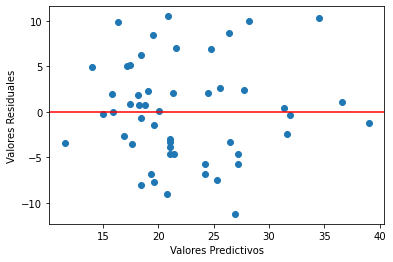

In [30]:
plt.scatter(modelo.predict(), modelo.resid)
plt.axhline(0,color="r")
plt.ylabel("Valores Residuales")
plt.xlabel("Valores Predictivos");

Se observa que la varianza es constante.


**Metricas del Modelo**

In [ ]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Brth15to17   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     56.00
Date:                Mon, 25 Jul 2022   Prob (F-statistic):           1.19e-09
Time:                        17:31:15   Log-Likelihood:                -158.75
No. Observations:                  51   AIC:                             321.5
Df Residuals:                      49   BIC:                             325.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2673      2.530      1.687      0.098      -0.816       9.351
PovPct         1.3733      0.184      7.483      0.000       1.005       1.742
==============================================================================
Omnibus:                        1.553   Durbin-Watson:                   2.284
Prob(Omnibus):                  0.460   Jarque-Bera (JB):                1.292
Skew:                           0.207   Prob(JB):                        0.524
Kurtosis:                       2.339   Cond. No.                         45.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusiones Parte 2



- No se observan grandes significancias al momento de comparar los coeficientes obtenidos. Por tanto, las mismas conclusiones anteriores pueden ser replicadas en este apartado, solo se debería ajustar con los nuevos valores obtenidos.-

